# 2.3 Spark DataFrame

Agenda
- Seleccion
- Filtrado de Información
- Procesamiento de Datos

**NOTA**

Recuerde inicializar el SparkContext en caso de GoogleColab u otro entorno

Analizaremos Casos de Coranavirus para el estudio de las propiedadesd e Dataframe

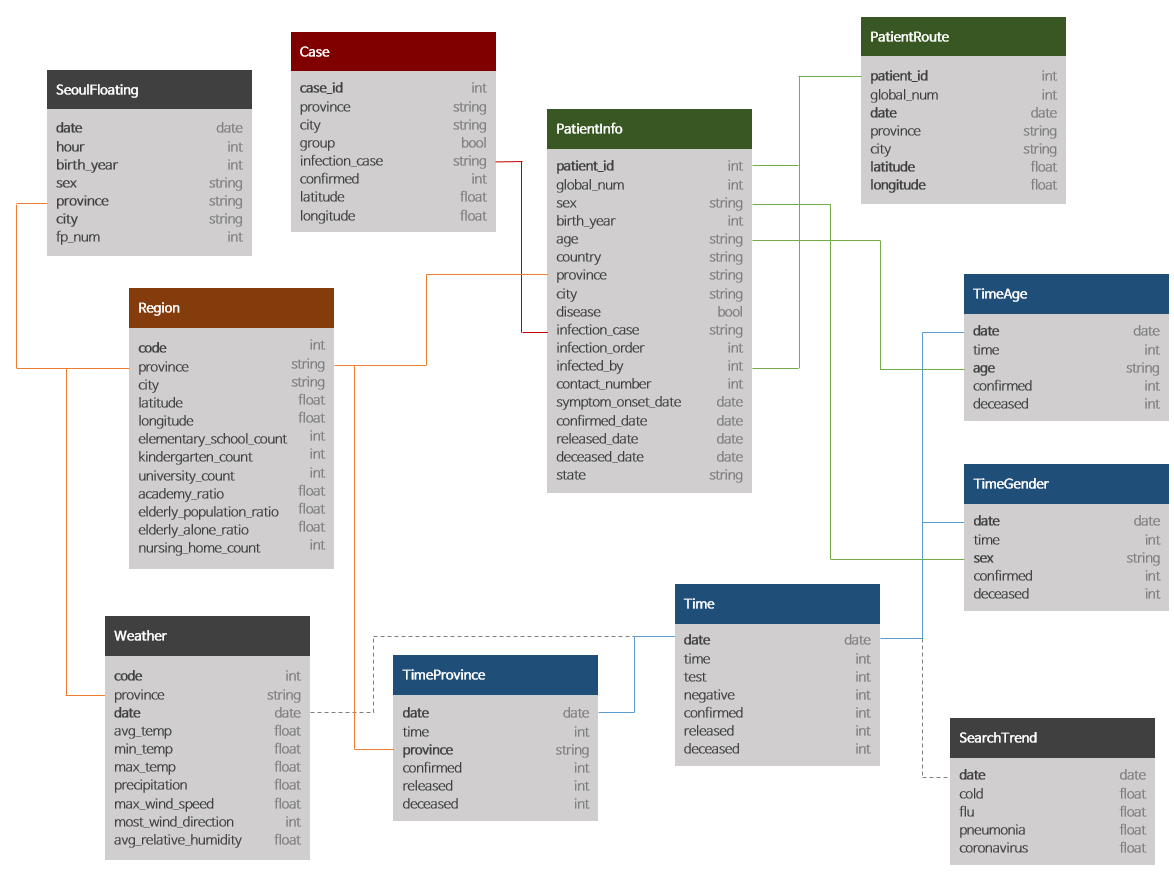


In [2]:
#Google Colab

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import os
import shutil

# solo google colab
import io
from google.colab import files

# inicializamos datos
spark = SparkSession.builder.appName('spark_test').getOrCreate()

In [4]:
# Cargando data Google Colab
uploaded = files.upload()

Saving Case.csv to Case.csv
Saving Region.csv to Region.csv
Saving TimeProvince.csv to TimeProvince.csv


In [5]:
os.listdir()

['.config', 'Case.csv', 'TimeProvince.csv', 'Region.csv', 'sample_data']

In [6]:
if not os.path.isdir('coronavirusDataSet'):
  os.mkdir('coronavirusDataSet')

path = './coronavirusDataSet/'
for file in os.listdir():
  if '.csv' in file:
    shutil.move(f'{file}', path)

os.listdir(path)

['Case.csv', 'TimeProvince.csv', 'sample_data', 'Region.csv', '.config']

In [11]:
# Cargando Datos

from pyspark.sql.types import StructField, StructType, StringType, DateType, IntegerType

options = {
    'header': True,
    'inferSchema': True,
    'sep': ','
}

# otra forma de Lectura
casosDf = spark.read.options(**options).csv('./coronavirusDataSet/Case.csv')
regionDf = spark.read.options(**options).csv('./coronavirusDataSet/Region.csv')

# arreglar para leer con su esquema pertinente

schema = StructType([
              StructField('date', DateType(), True),
              StructField('time', IntegerType(), True),
              StructField('province', StringType(), True),
              StructField('confirmed', IntegerType(), True),
              StructField('released', IntegerType(), True),
              StructField('deceased', IntegerType(), True)
])

timeProvinceDf = spark.read.options(**options).schema(schema).csv('./coronavirusDataSet/TimeProvince.csv')


In [8]:
# casos Df
### Relation: TimeProvince - Region : Province Columns
### Relation: Casos - Region: Province Columns
casosDf.printSchema()
casosDf.show(4)

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)

+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|case_id|province|         city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|   Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|      Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|      Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
+-------+--------+-------------+--

In [12]:
# time Province DF

### Relation: TimeProvince - Region : Province Columns

timeProvinceDf.printSchema()
timeProvinceDf.show(4)

root
 |-- date: date (nullable = true)
 |-- time: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- released: integer (nullable = true)
 |-- deceased: integer (nullable = true)

+----------+----+--------+---------+--------+--------+
|      date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-01-20|  16|   Seoul|        0|       0|       0|
|2020-01-20|  16|   Busan|        0|       0|       0|
|2020-01-20|  16|   Daegu|        0|       0|       0|
|2020-01-20|  16| Incheon|        1|       0|       0|
+----------+----+--------+---------+--------+--------+
only showing top 4 rows



In [10]:
# Regions DF

regionDf.printSchema()
regionDf.show(4)

root
 |-- code: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- elementary_school_count: integer (nullable = true)
 |-- kindergarten_count: integer (nullable = true)
 |-- university_count: integer (nullable = true)
 |-- academy_ratio: double (nullable = true)
 |-- elderly_population_ratio: double (nullable = true)
 |-- elderly_alone_ratio: double (nullable = true)
 |-- nursing_home_count: integer (nullable = true)

+-----+--------+-----------+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
| code|province|       city| latitude| longitude|elementary_school_count|kindergarten_count|university_count|academy_ratio|elderly_population_ratio|elderly_alone_ratio|nursing_home_count|
+-----+--------+-----------+---------+----------+----------------

## Analizando la Data

A partir de este punto inicializaremos con el analisis de  `casosDf` a manera de realizar operaciones sobre este DataFrame

## 1. Funciones Básicas
-------------------------------




### 1.1 Seleccion Datos

In [14]:
# 'df_name.column_name' -> Para seleccionar las columnas que nos interesan

# recuerda usar .show() para mostrar los datos
casosDf.select( casosDf.case_id, casosDf.city).show(2)



+-------+----------+
|case_id|      city|
+-------+----------+
|1000001|Yongsan-gu|
|1000002|   Guro-gu|
+-------+----------+
only showing top 2 rows



In [15]:
# 'columna_name' -> Solo basta tener el nombre de columna

columns = ['case_id', 'city']
casosDf.select(columns).show(2)


+-------+----------+
|case_id|      city|
+-------+----------+
|1000001|Yongsan-gu|
|1000002|   Guro-gu|
+-------+----------+
only showing top 2 rows



In [16]:
# Spark SQL -> metodo 'col' para seleccionar las columnas
from pyspark.sql.functions import col

# select case_id, city alias 'ciudad'

# 'Alias' permitido sobre Spark SQL
casosDf.select(col('case_id'), col('city').alias('ciudad')).show(3)

+-------+-------------+
|case_id|       ciudad|
+-------+-------------+
|1000001|   Yongsan-gu|
|1000002|      Guro-gu|
|1000003|Dongdaemun-gu|
+-------+-------------+
only showing top 3 rows



### 1.2 Cambiando Nombre de columna

Usaremos `withColumnRename` para el cambio de nombre




In [17]:
casosRenameDf = casosDf.withColumnRenamed("infection_case","infection_source")


print(casosDf.show(1))

# para hacer efectivo el cambio debemos guardar en una variable nueva y mostrar
print(casosRenameDf.show(1))

+-------+--------+----------+-----+--------------+---------+---------+----------+
|case_id|province|      city|group|infection_case|confirmed| latitude| longitude|
+-------+--------+----------+-----+--------------+---------+---------+----------+
|1000001|   Seoul|Yongsan-gu| true| Itaewon Clubs|       72|37.538621|126.992652|
+-------+--------+----------+-----+--------------+---------+---------+----------+
only showing top 1 row

None
+-------+--------+----------+-----+----------------+---------+---------+----------+
|case_id|province|      city|group|infection_source|confirmed| latitude| longitude|
+-------+--------+----------+-----+----------------+---------+---------+----------+
|1000001|   Seoul|Yongsan-gu| true|   Itaewon Clubs|       72|37.538621|126.992652|
+-------+--------+----------+-----+----------------+---------+---------+----------+
only showing top 1 row

None


### 1.3 Ordenamiento

`Sort` permitira el ordenamiento de Datos

`OrderBy` tambien realiza la misma tarea


In [18]:

# Primera forma Ordeamiento
casosDf.sort('confirmed', ascending=False).show(5)

+-------+----------------+---------------+-----+--------------------+---------+--------+---------+
|case_id|        province|           city|group|      infection_case|confirmed|latitude|longitude|
+-------+----------------+---------------+-----+--------------------+---------+--------+---------+
|1200001|           Daegu|         Nam-gu| true|  Shincheonji Church|     4510|35.84008| 128.5667|
|1200008|           Daegu|              -|false|contact with patient|      929|       -|        -|
|1200009|           Daegu|              -|false|                 etc|      724|       -|        -|
|6000001|Gyeongsangbuk-do|from other city| true|  Shincheonji Church|      566|       -|        -|
|1000010|           Seoul|              -|false|     overseas inflow|      321|       -|        -|
+-------+----------------+---------------+-----+--------------------+---------+--------+---------+
only showing top 5 rows



In [19]:
# from pyspark.sql.functions import * 
# descending Sort
from pyspark.sql import functions as F # nos ayuda a colocar un alias al modulo functions

casosDf.sort(F.desc("confirmed")).show(5)

+-------+----------------+---------------+-----+--------------------+---------+--------+---------+
|case_id|        province|           city|group|      infection_case|confirmed|latitude|longitude|
+-------+----------------+---------------+-----+--------------------+---------+--------+---------+
|1200001|           Daegu|         Nam-gu| true|  Shincheonji Church|     4510|35.84008| 128.5667|
|1200008|           Daegu|              -|false|contact with patient|      929|       -|        -|
|1200009|           Daegu|              -|false|                 etc|      724|       -|        -|
|6000001|Gyeongsangbuk-do|from other city| true|  Shincheonji Church|      566|       -|        -|
|1000010|           Seoul|              -|false|     overseas inflow|      321|       -|        -|
+-------+----------------+---------------+-----+--------------------+---------+--------+---------+
only showing top 5 rows



In [20]:
# Ascending Sort
casosDf.sort(F.asc("confirmed")).show(5)

+-------+----------+---------------+-----+--------------------+---------+--------+---------+
|case_id|  province|           city|group|      infection_case|confirmed|latitude|longitude|
+-------+----------+---------------+-----+--------------------+---------+--------+---------+
|3000005|Gangwon-do|              -|false|contact with patient|        0|       -|        -|
|1300004|   Gwangju|              -|false|                 etc|        0|       -|        -|
|7000002|   Jeju-do|              -|false|contact with patient|        0|       -|        -|
|1700003|    Sejong|from other city| true|  Shincheonji Church|        1|       -|        -|
|1700006|    Sejong|              -|false|                 etc|        1|       -|        -|
+-------+----------+---------------+-----+--------------------+---------+--------+---------+
only showing top 5 rows



#### 1.4 Casteo de Columnas

De acuerdo a la relacion de tablas, nuestro DF debe tener un tipo de dato distinto

```
CasosDf
---------
- latitude - De string a float
- longitude', de string a float
```

In [21]:
from pyspark.sql.types import LongType, IntegerType, DecimalType, StringType, FloatType

# Datatypes - https://sparkbyexamples.com/pyspark/pyspark-sql-types-datatype-with-examples/
# withColumn: Permite crear una nueva columna o interactuar con la columna

casosCastDf = (casosDf
                  .withColumn('latitude', 
                              F.col('latitude').cast(FloatType()) )
                  .withColumn('longitude',
                              # logica
                              F.col('longitude').cast(FloatType()) )
)

casosCastDf.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: float (nullable = true)
 |-- longitude: float (nullable = true)



### 1.5 Valores Distintos

`Distinct` ayudará a mostrar valores únicos de columnas

In [22]:
casosDf.select('latitude').distinct().sort('latitude').show(3)

+---------+
| latitude|
+---------+
|        -|
|35.078825|
|35.164845|
+---------+
only showing top 3 rows



In [23]:
# Observemos que el casteo convirtio valores '-' a null
casosCastDf.select('latitude').distinct().sort('latitude').show(3)

+---------+
| latitude|
+---------+
|     null|
|35.078827|
|35.164845|
+---------+
only showing top 3 rows



## 2. Filtrado de Información

### 2.1 Filtrado de Información

Podemos filtrar un dataframe mediante condiciones booleanas sobre columnas

Para ello usaremos:
`filter` o `where`

Ambos son indistintos 'where' va más relacionado a sql sintax




In [24]:
casosDf.select('city').distinct().show(5)

+---------------+
|           city|
+---------------+
|     Cheonan-si|
|from other city|
|     Yongsan-gu|
|        Dong-gu|
|         Sejong|
+---------------+
only showing top 5 rows



In [28]:
# filtrando según ciudad
from pyspark.sql import functions as F

# 3 Formas
# casosDf.where( F.col('city') =='Yongsan-gu').show()
# df.filter("age > 3").collect()
casosDf.filter( F.col('city') =='Yongsan-gu').show()

casosDf.filter( casosDf.city =='Yongsan-gu').show()



+-------+--------+----------+-----+--------------+---------+---------+----------+
|case_id|province|      city|group|infection_case|confirmed| latitude| longitude|
+-------+--------+----------+-----+--------------+---------+---------+----------+
|1000001|   Seoul|Yongsan-gu| true| Itaewon Clubs|       72|37.538621|126.992652|
+-------+--------+----------+-----+--------------+---------+---------+----------+

+-------+--------+----------+-----+--------------+---------+---------+----------+
|case_id|province|      city|group|infection_case|confirmed| latitude| longitude|
+-------+--------+----------+-----+--------------+---------+---------+----------+
|1000001|   Seoul|Yongsan-gu| true| Itaewon Clubs|       72|37.538621|126.992652|
+-------+--------+----------+-----+--------------+---------+---------+----------+



podemos concatenar varias condiciones usando `&` para **AND** ,  `|` para **OR** y `~` como **NOT** o negacion.

Tambien debemos recordar los operadores: `==` , `!=` , `>`, `<` , `>=` , `<=`

In [30]:
cond = (casosDf.confirmed>10) & (casosDf.province=='Daegu')

casosDf.filter( cond ).show()

casosDf.filter(casosDf.confirmed>10).filter(casosDf.province=='Daegu').show()

+-------+--------+------------+-----+--------------------+---------+---------+----------+
|case_id|province|        city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+------------+-----+--------------------+---------+---------+----------+
|1200001|   Daegu|      Nam-gu| true|  Shincheonji Church|     4510| 35.84008|  128.5667|
|1200002|   Daegu|Dalseong-gun| true|Second Mi-Ju Hosp...|      196|35.857375|128.466651|
|1200003|   Daegu|      Seo-gu| true|Hansarang Convale...|      128|35.885592|128.556649|
|1200004|   Daegu|Dalseong-gun| true|Daesil Convalesce...|      100|35.857393|128.466653|
|1200005|   Daegu|     Dong-gu| true|     Fatima Hospital|       37| 35.88395|128.624059|
|1200007|   Daegu|           -|false|     overseas inflow|       24|        -|         -|
|1200008|   Daegu|           -|false|contact with patient|      929|        -|         -|
|1200009|   Daegu|           -|false|                 etc|      724|        -|         -|
+-------+-

<h3>Funciones Extras: Like, isin, notIsIn ...</h3>

Funciones como `like` , `isin`, `notIsIn` y otras de la sintaxis SQL tambien pueden ser usadas



In [31]:
casosDf.select('province').distinct().orderBy('province').show(7)

+-----------------+
|         province|
+-----------------+
|            Busan|
|Chungcheongbuk-do|
|Chungcheongnam-do|
|            Daegu|
|          Daejeon|
|       Gangwon-do|
|          Gwangju|
+-----------------+
only showing top 7 rows



In [33]:
# Mostrando provincias que inicien con D 
from pyspark.sql import functions as F

# usando like
casosDf.filter( F.col('province').like('Da%') ).show()

casosFilterdDf = casosDf.filter( F.col('province').isin('Daegu', 'Daejeon') )
casosFilterdDf.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+
|1200001|   Daegu|         Nam-gu| true|  Shincheonji Church|     4510| 35.84008|  128.5667|
|1200002|   Daegu|   Dalseong-gun| true|Second Mi-Ju Hosp...|      196|35.857375|128.466651|
|1200003|   Daegu|         Seo-gu| true|Hansarang Convale...|      128|35.885592|128.556649|
|1200004|   Daegu|   Dalseong-gun| true|Daesil Convalesce...|      100|35.857393|128.466653|
|1200005|   Daegu|        Dong-gu| true|     Fatima Hospital|       37| 35.88395|128.624059|
|1200006|   Daegu|from other city| true|Cheongdo Daenam H...|        2|        -|         -|
|1200007|   Daegu|              -|false|     overseas inflow|       24|        -|         -|
|1200008|   Daegu|              -|false|contact with patient|      929

In [35]:
# busacndo valores nulos

cond = ( F.col('latitude').isNull() )  & ( F.col('longitude').isNull() ) & (casosCastDf.city != '-') 

casosCastDf.filter( cond ).show()


+-------+-----------------+---------------+-----+--------------------+---------+--------+---------+
|case_id|         province|           city|group|      infection_case|confirmed|latitude|longitude|
+-------+-----------------+---------------+-----+--------------------+---------+--------+---------+
|1000009|            Seoul|from other city| true|  Shincheonji Church|        8|    null|     null|
|1100002|            Busan|from other city| true|  Shincheonji Church|       12|    null|     null|
|1100006|            Busan|from other city| true|Cheongdo Daenam H...|        1|    null|     null|
|1200006|            Daegu|from other city| true|Cheongdo Daenam H...|        2|    null|     null|
|1300001|          Gwangju|from other city| true|  Shincheonji Church|        9|    null|     null|
|1400001|          Incheon|from other city| true| Guro-gu Call Center|       20|    null|     null|
|1400002|          Incheon|from other city| true|  Shincheonji Church|        2|    null|     null|


## 3. Agregaciones

utilizaremos `groupby` para realizar agrupamientos de informacion sobre una columnas





In [36]:
casosDf.groupBy('province')

El agrupamiento de datos implica utilizar funciones de agregacion como: `count`, `sum`, `mean`, `min`, `max` a una columna del df

In [37]:
casosDf.groupBy('province').sum('confirmed').show()

+-----------------+--------------+
|         province|sum(confirmed)|
+-----------------+--------------+
|           Sejong|            46|
|            Ulsan|            42|
|Chungcheongbuk-do|            38|
|       Gangwon-do|            51|
|          Gwangju|            30|
| Gyeongsangbuk-do|          1314|
|            Daegu|          6650|
| Gyeongsangnam-do|           115|
|          Incheon|            79|
|          Jeju-do|            14|
|      Gyeonggi-do|           564|
|            Busan|           139|
|          Daejeon|            34|
|            Seoul|           646|
|Chungcheongnam-do|           137|
|     Jeollabuk-do|            15|
|     Jeollanam-do|            16|
+-----------------+--------------+



In [38]:
# tambien podemos aplicar agurpamiento por mas de una columna

from pyspark.sql import functions as F

casosDf.groupBy( ["province","city"]
      ).agg(
          F.sum("confirmed") ,F.max("confirmed")
      ).show(3)

+----------------+--------+--------------+--------------+
|        province|    city|sum(confirmed)|max(confirmed)|
+----------------+--------+--------------+--------------+
|Gyeongsangnam-do|Jinju-si|            10|            10|
|           Seoul| Guro-gu|           139|            98|
|         Daejeon|       -|            27|            10|
+----------------+--------+--------------+--------------+
only showing top 3 rows



In [39]:
# Podemos cambiar los nombres de columnas nuevas con 'alias'

casosDf.groupBy(["province","city"]).agg(
    F.sum("confirmed").alias("TotalConfirmed"),
    F.max("confirmed").alias("MaxFromOneConfirmedCase")
    ).show(3)



+----------------+--------+--------------+-----------------------+
|        province|    city|TotalConfirmed|MaxFromOneConfirmedCase|
+----------------+--------+--------------+-----------------------+
|Gyeongsangnam-do|Jinju-si|            10|                     10|
|           Seoul| Guro-gu|           139|                     98|
|         Daejeon|       -|            27|                     10|
+----------------+--------+--------------+-----------------------+
only showing top 3 rows



## 4. Joins


Podemos unir dos dataframes en funcion de sus columnas comunes usando `join`

La operacion merge implica combinar 2 df a partir de uno o más valores llave o `key`


<img src='https://miro.medium.com/max/1400/1*M6LZvSvpGxFCP5MMs3deow.png'>

In [40]:
# join 'casosDf' y 'regionDf' por columnas 'province' and 'city' 

casosWithRegionDf = casosDf.join( regionDf, ['province','city'],how='inner')
casosWithRegionDf.show(10, False)

+--------+-------------+-------+-----+-----------------------------+---------+---------+----------+-----+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
|province|city         |case_id|group|infection_case               |confirmed|latitude |longitude |code |latitude |longitude |elementary_school_count|kindergarten_count|university_count|academy_ratio|elderly_population_ratio|elderly_alone_ratio|nursing_home_count|
+--------+-------------+-------+-----+-----------------------------+---------+---------+----------+-----+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
|Seoul   |Guro-gu      |1000004|true |Manmin Central Church        |41       |37.481059|126.894343|10070|37.495632|126.88765 |26                     |34                |3               |1.0          |16.21

In [41]:
# renombrando columnas para diferencias pertenencia de estas

df1 = casosDf.select( *(col(x).alias(x + '_df1') for x in casosDf.columns))
df2= regionDf.select(*(col(x).alias(x + '_df2') for x in regionDf.columns))

joinExpression = ( F.col('province_df1') == F.col('province_df2') ) & ( F.col('city_df1') == F.col('city_df2') )

casosWithRegionDf = df1.join( df2, joinExpression, how='inner')

casosWithRegionDf.show(5)

+-----------+------------+-------------+---------+--------------------+-------------+------------+-------------+--------+------------+-------------+------------+-------------+---------------------------+----------------------+--------------------+-----------------+----------------------------+-----------------------+----------------------+
|case_id_df1|province_df1|     city_df1|group_df1|  infection_case_df1|confirmed_df1|latitude_df1|longitude_df1|code_df2|province_df2|     city_df2|latitude_df2|longitude_df2|elementary_school_count_df2|kindergarten_count_df2|university_count_df2|academy_ratio_df2|elderly_population_ratio_df2|elderly_alone_ratio_df2|nursing_home_count_df2|
+-----------+------------+-------------+---------+--------------------+-------------+------------+-------------+--------+------------+-------------+------------+-------------+---------------------------+----------------------+--------------------+-----------------+----------------------------+----------------------

In [43]:
casosDf.count()

115

In [44]:
regionDf.count()

244

In [42]:
casosWithRegionDf.count()

39

Como punto general existen diferentes formas de combinar los dataframe, siendo el método `inner` el utilizado por defecto


<img src='http://www.theinformationlab.co.uk/wp-content/uploads/2015/02/Joins-Tableau-custom-SQL-and-Alteryx.png'>

In [45]:
# realizando 'left' join
casosWithRegionDf = casosDf.join(regionDf, ['province','city'],how='left')

casosWithRegionDf.show(10)

+--------+---------------+-------+-----+--------------------+---------+---------+----------+-----+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
|province|           city|case_id|group|      infection_case|confirmed| latitude| longitude| code| latitude| longitude|elementary_school_count|kindergarten_count|university_count|academy_ratio|elderly_population_ratio|elderly_alone_ratio|nursing_home_count|
+--------+---------------+-------+-----+--------------------+---------+---------+----------+-----+---------+----------+-----------------------+------------------+----------------+-------------+------------------------+-------------------+------------------+
|   Seoul|     Yongsan-gu|1000001| true|       Itaewon Clubs|       72|37.538621|126.992652|10210|37.532768|126.990021|                     15|                13|               1|         0.68|                   16.87|        

In [46]:
casosWithRegionDf.count()

115

## 5. Creación de Nuevas Columnas


`withColumn` permite agregar nuevas columnas o cambiar los valores de una ya existente



In [47]:
import pyspark.sql.functions as F

# withColumn('nombre_columna', lógica aplicar )

casesWithNewConfirmed = casosDf.withColumn("NewConfirmed", 100 + F.col("confirmed"))

casesWithNewConfirmed.show(10)

+-------+--------+---------------+-----+--------------------+---------+---------+----------+------------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|NewConfirmed|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+------------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|         172|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|         198|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|         120|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|         141|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|         114|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|         113|
|1000007|   Seoul|      Jongno-gu| true|Jongno

## 6. Case When

In [52]:
casosDf.select('confirmed').distinct().orderBy('confirmed', ascending=False ).show()

+---------+
|confirmed|
+---------+
|     4510|
|      929|
|      724|
|      566|
|      321|
|      225|
|      196|
|      192|
|      134|
|      128|
|      120|
|      103|
|      100|
|       98|
|       72|
|       68|
|       66|
|       57|
|       50|
|       49|
+---------+
only showing top 20 rows



In [54]:

from pyspark.sql import functions as F

casosNewProvinceDf = casosDf.withColumn('NewSplit',  F.when(F.col('confirmed') <500, F.lit('Bajo'))
                                                      .when(F.col('confirmed').between(500, 1000), F.lit('Medio'))
                                                      .otherwise(F.lit('Alto'))
                                                      )
casosNewProvinceDf.show()

+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------+
|case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|NewSplit|
+-------+--------+---------------+-----+--------------------+---------+---------+----------+--------+
|1000001|   Seoul|     Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|    Bajo|
|1000002|   Seoul|        Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|    Bajo|
|1000003|   Seoul|  Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|    Bajo|
|1000004|   Seoul|        Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|    Bajo|
|1000005|   Seoul|   Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|    Bajo|
|1000006|   Seoul|   Seongdong-gu| true|    Seongdong-gu APT|       13| 37.55713|  127.0403|    Bajo|
|1000007|   Seoul|      Jongno-gu| true|Jongno Community ...|       10| 37.57681| 

# LABORATORIO Dataframe

El fichero **titanic.csv** contiene información sobre los pasajeros del Titanic. 

Escribir un programa con los siguientes requisitos:

1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las primeras filas del DataFrame
3. Mostrar por pantalla los datos del pasajero con identificador 148.
4. Mostrar por pantalla las filas pares del DataFrame.
5. Mostrar por pantalla los nombres de las personas que iban en primera clase ordenadas alfabéticamente.
6. Mostrar por pantalla el porcentaje de personas que sobrevivieron y murieron.
7. Mostrar por pantalla el porcentaje de personas que sobrevivieron en cada clase.
8. Eliminar del DataFrame los pasajeros con edad desconocida.
9. Mostrar por pantalla la edad media de las mujeres que viajaban en cada clase.
10. Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.
11. Mostrar por pantalla el porcentaje de menores y mayores de edad que sobrevivieron en cada clase.

In [55]:
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\

In [56]:
path = 'titanic.csv'

options = {
  'header': True,
  'sep': ',',
  'inferSchema':True,
  'quote': '"'
}

df = spark.read.format('csv').options(**options).load(path)
df.show(3, False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)|female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                             |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+--

In [57]:
# Mostrar por pantalla los datos del pasajero con identificador 148.
from pyspark.sql import functions as F
df.filter( F.col('PassengerId')==148 ).show()


+-----------+--------+------+--------------------+------+---+-----+-----+----------+------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|    Ticket|  Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------+------+-----+--------+
|        148|       0|     3|"Ford, Miss. Robi...|female|9.0|    2|    2|W./C. 6608|34.375| null|       S|
+-----------+--------+------+--------------------+------+---+-----+-----+----------+------+-----+--------+



In [60]:
# Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.
from pyspark.sql import functions as F

newDf = df.withColumn('esMayorEdad', F.when( F.col('Age') >=18, F.lit(True)  )
                                      .otherwise(F.lit(False))  
)
newDf.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|esMayorEdad|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|       true|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       true|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|       true|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|       true|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|      

In [59]:
newDf.groupby('esMayorEdad').count().show()

+-----------+-----+
|esMayorEdad|count|
+-----------+-----+
|  MenorEdad|  290|
|  MayorEdad|  601|
+-----------+-----+



In [61]:
newDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- esMayorEdad: boolean (nullable = false)



RELACIONADO
--------------------

- [Guide Spark DataFrame](https://towardsdatascience.com/the-most-complete-guide-to-pyspark-dataframes-2702c343b2e8)